<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3// Statistical Treatment for Datasets</font></h1>

Mohamad Syaipul Anwar<br>
PYTN076ONL006

#### **Bank Marketing Dataset**

Dataset ini berisi kampanye pemasaran dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon.
Terkadang, pihak pemasaran perlu menghubungi berkali kali nasabah agar mau untuk membuka tabungan berjangka. Klasifikasi ini bertujuan apakah klien akan berlangganan atau tidak.

Dataset ini terdiri dari:

**Data Klien:**

1. Age: Berisi usia klien
2. Job : Berisi jenis pekerjaan klien
3. marital : Berisi status pernikahan seperti 'sudah menikah','Lajang' ataupun 'Cerai'
4. education : Berisi riwayat pendidikan klien
5. Default : Berisi keterangan apakah klien memiliki kredit secara default atau tidak
6. housing : Berisi keterangan apakah klien memiliki pinjaman rumah atau tidak
7. loan : Berisi keterangan apakah klien memiliki pinjaman pribada atau tidak

**Kontak terakhir dengan calon nasabah:**

1. contact:  jenis komunikasi kontak (kategoris: 'seluler', 'telepon')
2. month:  kontak terakhir bulan dalam setahun (kategoris: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. Day_of_week: hari kontak terakhir dalam seminggu (kategoris: 'sen','sel','wed','kamis','fri')
4. duration: durasi kontak terakhir, dalam detik (numerik). 

Catatan penting: atribut duration: ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

**Informasi lainnya:**

1. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
2. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien tidak dihubungi sebelumnya)
3. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
4. poutcome: hasil dari kampanye pemasaran sebelumnya (kategoris: 'gagal', 'tidak ada', 'sukses')

**Informasi mengenai sosial dan ekonomi:**

1. emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numerik)
2. cons.price.idx: indeks harga konsumen - indikator bulanan (numerik)
3. cons.conf.idx: indeks kepercayaan konsumen - indikator bulanan (numerik)
4. euribor3m: tarif euribor 3 bulan - indikator harian (numerik)
5. nr.employed: jumlah karyawan - indikator triwulanan (numerik)

## **Data Preparation**

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from time import time
from sklearn import tree
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from six import StringIO

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
plt.style.use("ggplot")

In [2]:
# Load dataset
df_bf = pd.read_csv("data/bank-additional-full.csv", sep=";")
print ('Data read into a pandas dataframe!')
df_bf

Data read into a pandas dataframe!


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Melihat 5 data teratas
df_bf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Melihat 5 data terbawah
df_bf.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# Melihat Dimensi data
df_bf.shape

(41188, 21)

In [6]:
# Melihat type data
df_bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## **Exploratory Data Analysis**

In [7]:
# Mengecek 'Missing Value' dari dataset
print(df_bf.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Dari hasil diatas dapat kita ketahui bahwa dataset ini tidak memiliki 'Missing Value' maupun data 'Null'

In [8]:
# Melihat 'Categorial Data' dan 'Numerical Data' pada dataset
df_bf.describe(exclude="number")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
df_bf.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### **Data Visualization**

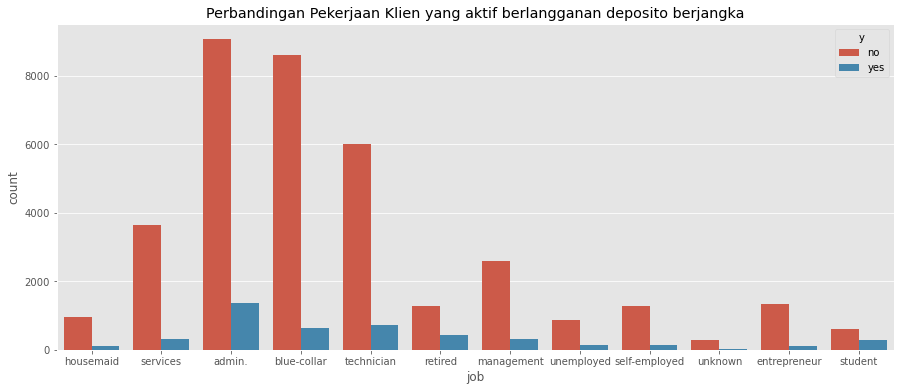

In [10]:
# Melihat Jenis Pekerjaan Klien yang aktif memiliki deposito
plt.figure(figsize=(15, 6))
plt.title('Perbandingan Pekerjaan Klien yang aktif berlangganan deposito berjangka')
sns.countplot(x = df_bf['job'], hue=df_bf["y"])
plt.show()

Pada Visualisasi diatas, dapat diketahui bahwa: klien terbanyak yang mendaftar deposito berjangka memiliki pekerjaan sebagai admin

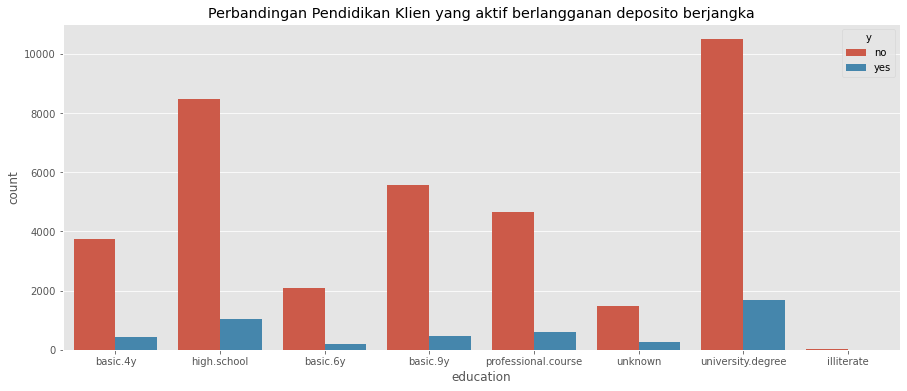

In [11]:
# Melihat pendidikan Klien yang aktif memiliki deposito
plt.figure(figsize=(15, 6))
plt.title('Perbandingan Pendidikan Klien yang aktif berlangganan deposito berjangka')
sns.countplot(x = df_bf['education'], hue=df_bf["y"])
plt.show()

Pada Visualisasi diatas, dapat diketahui bahwa: klien terbanyak yang mendaftar deposito berjangka memiliki pendidikan sebagai sarjana universitas

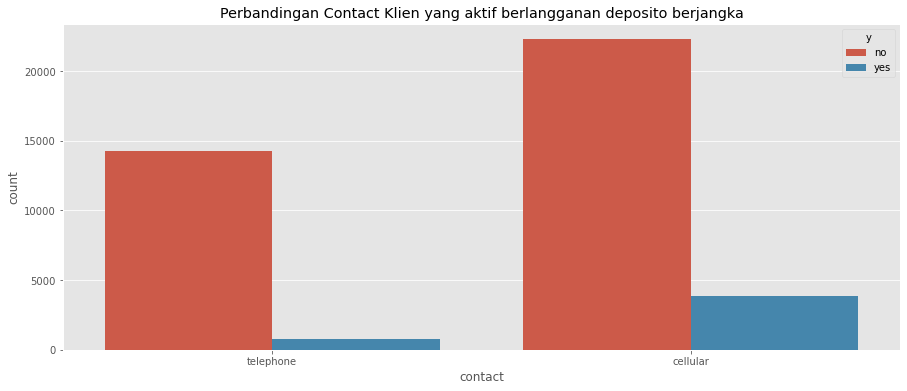

In [12]:
# Melihat Jenis Contact Klien yang aktif memiliki deposito
plt.figure(figsize=(15, 6))
plt.title('Perbandingan Contact Klien yang aktif berlangganan deposito berjangka')
sns.countplot(x = df_bf['contact'], hue=df_bf["y"])
plt.show()

Pada Visualisasi diatas, dapat diketahui bahwa: klien terbanyak yang mendaftar deposito berjangka berasal dari klien yang dihubungi dengan celular.

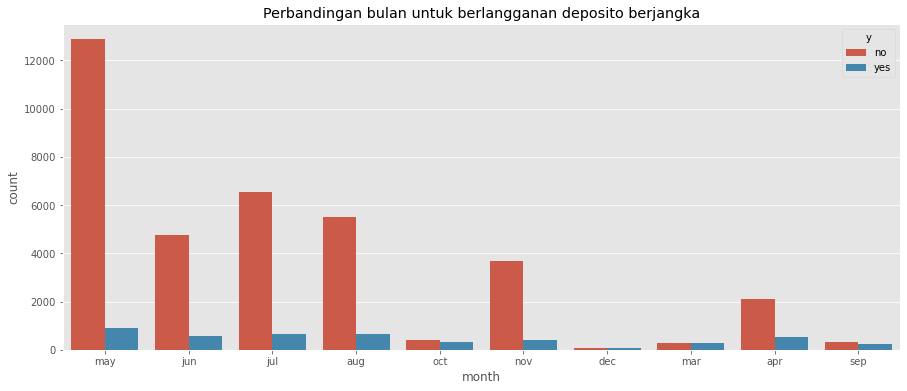

In [13]:
# Melihat bulan dengan frekuensi pendaftaran deposito
plt.figure(figsize=(15, 6))
plt.title('Perbandingan bulan untuk berlangganan deposito berjangka')
sns.countplot(x = df_bf['month'], hue=df_bf["y"])
plt.show()

Pada Visualisasi diatas, dapat diketahui bahwa: klien terbanyak yang mendaftar deposito berjangka mendaftar pada bulan may

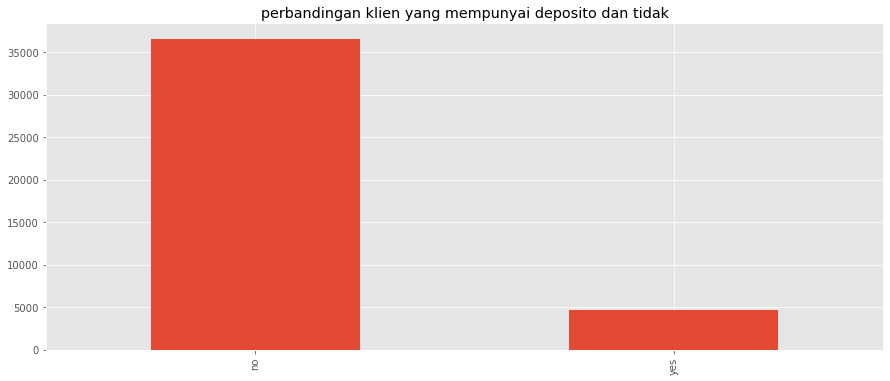

In [14]:
plt.figure(figsize=(15, 6))
df_bf["y"].value_counts().plot(kind="bar")
plt.title("perbandingan klien yang mempunyai deposito dan tidak")
plt.show()

Pada Visualisasi diatas, dapat diketahui bahwa: klien untuk saat ini lebih banyak tidak terdaftar sebagai pemilik deposito berjangka

## **Modeling**

In [15]:
# pisahkan data y dengan data x
X=df_bf.drop(['y'],axis=1)
y=df_bf['y']

In [16]:
# Periksa keunikan variabel
df_bf.apply(lambda x : len(x.unique()))

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [17]:
# Drop variabel yang tidak penting untuk masuk ke model
X=X.drop(columns=['contact','month','day_of_week','poutcome'])

In [18]:
X["job_ct"] = X["job"].replace({"admin.": 0, "blue-collar": 1, "technician": 2, "services": 3, "management": 4, "retired": 5, "entrepreneur": 6, "self-employed": 7, "housemaid": 8, "unemployed": 9, "student": 10, "unknown": 99})
X["mar_ct"] = X["marital"].replace({"married": 0, "single": 1, "divorced": 2, "unknown": 99})
X["edu_ct"] = X["education"].replace({"university.degree": 0, "high.school": 1, "basic.9y": 2, "professional.course": 3, "basic.4y": 4, "basic.6y": 5, "illiterate": 6, "unknown": 99})
X["def_ct"] = X["default"].replace({"no": 0, "yes": 1, "unknown": 99})
X["housing_ct"] = X["housing"].replace({"no": 0, "yes": 1, "unknown": 99})
X["loan_ct"] = X["loan"].replace({"no": 0, "yes": 1, "unknown": 99})

In [19]:
X = X.drop(["job", "marital", "education", "default", "housing", "loan"], axis=1)
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_ct,mar_ct,edu_ct,def_ct,housing_ct,loan_ct
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,8,0,4,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,99,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,5,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,0,3,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,3,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,5,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,2,0,3,0,0,0


## **Training and Testing Model**

In [20]:
scored=[]

In [21]:
def train_model(X, y, model, test_size=.3):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_size, random_state=99 )
    print(f"Training with {X_train.shape[0]} data.. Validating with {X_test.shape[0]}..")
    print("Standardizing data..")
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    start = time()
    model.fit(scaled_X_train, y_train)
    end = time()
    print(f"Done training {model.__class__.__name__} in {end-start:.3f}s")
    
    train_prediction = model.predict(scaled_X_train)
    test_prediction = model.predict(scaled_X_test)
    Score = metrics.accuracy_score(y_test, test_prediction)
    
    
    print("Training performance:")
    print(classification_report(y_train, train_prediction))

    print("Testing performance:")
    print(classification_report(y_test, test_prediction))
    
    print("Testing Data Confusion Matrix Visualization")
    plot_confusion_matrix(model, X_test, y_test)

    print('Accuracy Score: %.5f' % Score)

    scored.append(Score)

### Logistic Regression

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training LogisticRegression in 0.238s
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     25613
         yes       0.67      0.40      0.50      3218

    accuracy                           0.91     28831
   macro avg       0.80      0.69      0.72     28831
weighted avg       0.90      0.91      0.90     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     10935
         yes       0.67      0.39      0.49      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.90758


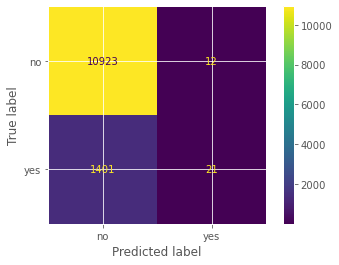

In [22]:
train_model(X,y,LogisticRegression())

### Random Forest

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training RandomForestClassifier in 3.862s
Training performance:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     25613
         yes       1.00      1.00      1.00      3218

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.94      0.97      0.95     10935
         yes       0.66      0.51      0.57      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.91292


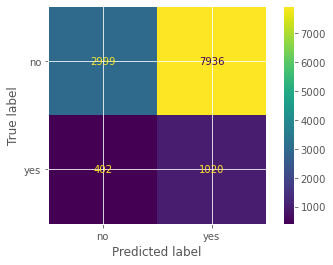

In [23]:
train_model(X, y, RandomForestClassifier())

### Gaussian Naive Bayes

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training GaussianNB in 0.049s
Training performance:
              precision    recall  f1-score   support

          no       0.95      0.90      0.92     25613
         yes       0.43      0.60      0.50      3218

    accuracy                           0.87     28831
   macro avg       0.69      0.75      0.71     28831
weighted avg       0.89      0.87      0.88     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.95      0.90      0.92     10935
         yes       0.44      0.60      0.51      1422

    accuracy                           0.86     12357
   macro avg       0.69      0.75      0.71     12357
weighted avg       0.89      0.86      0.87     12357

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.86469


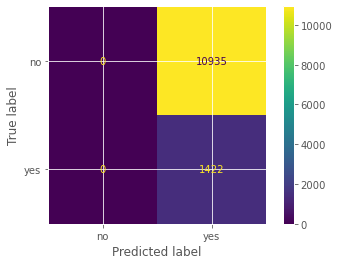

In [24]:
train_model(X,y,GaussianNB())

### Support Vector Machine

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training SVC in 39.264s
Training performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     25613
         yes       0.63      0.25      0.36      3218

    accuracy                           0.90     28831
   macro avg       0.77      0.62      0.65     28831
weighted avg       0.88      0.90      0.88     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94     10935
         yes       0.65      0.24      0.35      1422

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.89731


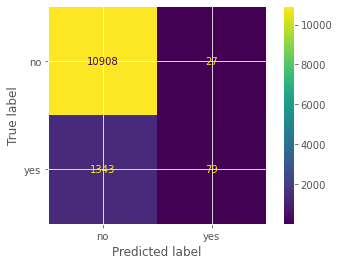

In [25]:
train_model(X,y,SVC(kernel="linear"))

### KNN

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=99)

In [27]:
error = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    error.append(np.mean(prediction != y_test))

print(error)

[0.11620943594723639, 0.10131909039410861, 0.10285668042405115, 0.09735372663267783, 0.09500687869223921, 0.09500687869223921, 0.09460224973699118, 0.09314558549809825, 0.09241725337865178, 0.09209355021445334, 0.09144614388605649, 0.09096058913975884, 0.09087966334870923, 0.08998947964716356, 0.08974670227401473, 0.08990855385611395, 0.09063688597556041, 0.09071781176661002, 0.09112244072185806, 0.08974670227401473, 0.09031318281136198, 0.08990855385611395, 0.0903941086024116, 0.09007040543821315, 0.08926114752771708, 0.08974670227401473, 0.08958485069191552, 0.09031318281136198, 0.08950392490086591, 0.08934207331876669, 0.08998947964716356, 0.08998947964716356, 0.088451889617221, 0.08820911224407219, 0.0882900380351218, 0.08909929594561787, 0.0894229991098163, 0.08869466699036983, 0.08885651857246904]


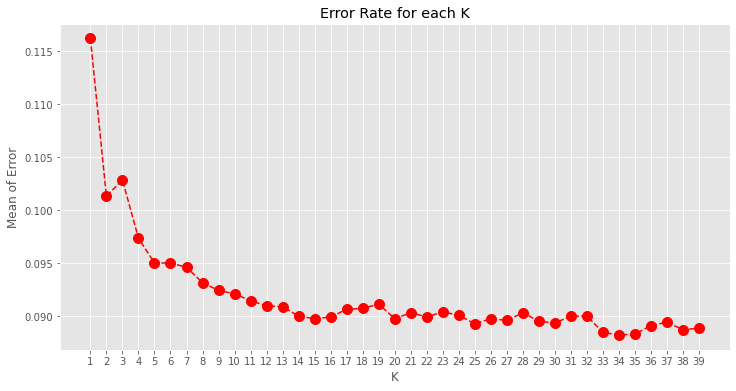

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color="r", linestyle="dashed", marker="o", markersize=10)
plt.title("Error Rate for each K")
plt.xlabel("K")
plt.xticks(range(1, 40))
plt.ylabel("Mean of Error")
plt.show()

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training KNeighborsClassifier in 0.029s
Training performance:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95     25613
         yes       0.67      0.42      0.51      3218

    accuracy                           0.91     28831
   macro avg       0.80      0.70      0.73     28831
weighted avg       0.90      0.91      0.90     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.93      0.98      0.95     10935
         yes       0.68      0.40      0.50      1422

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.90888


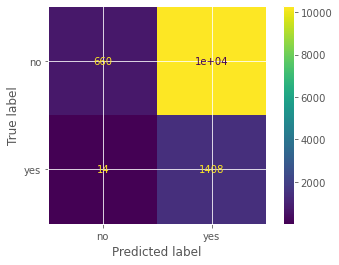

In [29]:
train_model(X,y,KNeighborsClassifier(n_neighbors=39))

### Decision Tree Classifier

In [30]:
# Create the parameter grid based on the results of grid search 
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [80, 90],
    'max_features': ['auto','sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 8, 10],
    'random_state': [42]
}
# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
cv_dt = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [31]:
cv_dt.fit(X_train, y_train)

cv_dt.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'criterion': 'gini',
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 42}

Training with 28831 data.. Validating with 12357..
Standardizing data..
Done training DecisionTreeClassifier in 0.285s
Training performance:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     25613
         yes       1.00      1.00      1.00      3218

    accuracy                           1.00     28831
   macro avg       1.00      1.00      1.00     28831
weighted avg       1.00      1.00      1.00     28831

Testing performance:
              precision    recall  f1-score   support

          no       0.94      0.93      0.93     10935
         yes       0.49      0.52      0.51      1422

    accuracy                           0.88     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.88      0.88     12357

Testing Data Confusion Matrix Visualization
Accuracy Score: 0.88347


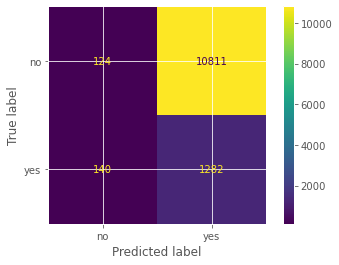

In [32]:
train_model(X,y,DecisionTreeClassifier())

## **Comparing All Algorithms**

In [33]:
Table_Summary = pd.DataFrame({'Machine Learning Algorithm':['Logistic Regression', 'Random Forest', 'G. Naive bayes', 'SVM', 'KNN', 'Decision Tree'],
                    'Accuracy Score':scored,
                    })
Table_Summary.sort_values(by=['Accuracy Score'], ascending=False)

,Machine Learning Algorithm,Accuracy Score
1,Random Forest,0.912924
4,KNN,0.908878
0,Logistic Regression,0.907583
3,SVM,0.897305
5,Decision Tree,0.883467
2,G. Naive bayes,0.864692


### **Insight**

Setelah melakukan eksplorasi eksplorasi pada data, train model dan test model didapatkan hasil :
- Setiap model memiliki f1-score yang seimbang dan memilki accuracy diatas 80%.
- Random Forest merupakan algoritma machine learning yang memiliki Accuracy dan F1-score tertinggi, dengan accuracy sebesar 91%
- KNN dan Logistic Regression tidak terlalu jauh accuracy nya dibandingkan Random Forest.
- Gaussian Naive Bayes merupakan algoritma dengan accuracy paling kecil.